## Log data munging and EDA

Just getting set up, testing

In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.insert(0,'../')

import mysticbit
from mysticbit import munging, ml, plots

Do you really want to drill me?
Do you really want to make me cry
AH AH AH AH


C:\Users\patri\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
df_logs = munging.load_log_data()

df_ml = munging.create_ml_dataframe(df_logs, feature_lags = range(10), label_lags = range(5))

df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'B200', 'G06', 'G08', 'G09', 'G070', 'B12', 'G12', 'B0700', 'G15', 'G10', 'B14', 'B08', 'G16', 'G17', 'B13'}
Test wells:  {'B05', 'B06', 'B03'}


In [5]:
X_cols = [c for c in df_ml_train.columns if 'lag' in c]
y_cols = [c for c in df_ml_train.columns if 'futr' in c]

print('X cols: ', X_cols)
print('y cols: ', y_cols)

X cols:  ['GR_lag_0', 'GR_lag_1', 'GR_lag_2', 'GR_lag_3', 'GR_lag_4', 'GR_lag_5', 'GR_lag_6', 'GR_lag_7', 'GR_lag_8', 'GR_lag_9']
y cols:  ['GR_futr_0', 'GR_futr_1', 'GR_futr_2', 'GR_futr_3', 'GR_futr_4']


In [6]:
models = ml.make_multiple_models(df_ml_train, X_cols, y_cols)

In [7]:
df_pred = ml.make_predictions(models, df_ml, X_cols, y_cols)

In [8]:
df_pred.head()

,HACKANAME,TVDSS,GR,RES_ID,GR_lag_0,GR_lag_1,GR_lag_2,GR_lag_3,GR_lag_4,GR_lag_5,...,GR_futr_0_pred_base,GR_futr_1_pred_base,GR_futr_2_pred_base,GR_futr_3_pred_base,GR_futr_4_pred_base,GR_futr_0_pred_low,GR_futr_1_pred_low,GR_futr_2_pred_low,GR_futr_3_pred_low,GR_futr_4_pred_low
0,B03,1583,58.601429,3005.0,58.601429,49.958333,55.180000,57.498000,36.400000,34.288000,...,58.974137,60.064967,59.208898,60.618342,57.706053,58.336405,41.717980,43.853588,41.769266,40.685719
1,B03,1584,51.303333,3005.0,51.303333,58.601429,49.958333,55.180000,57.498000,36.400000,...,51.412135,51.310896,52.329925,51.729542,44.724007,51.380918,40.974550,38.897448,39.571634,36.801894
2,B03,1586,52.490000,3005.0,52.490000,51.303333,58.601429,49.958333,55.180000,57.498000,...,52.448241,49.807871,50.546379,43.214482,43.922879,52.256301,42.770184,41.353779,37.205508,37.314543
3,B03,1587,53.040000,3005.0,53.040000,52.490000,51.303333,58.601429,49.958333,55.180000,...,53.634552,52.086479,48.875803,44.512364,43.428802,52.748267,41.205752,37.934715,38.355591,36.151753
4,B03,1591,58.120000,3005.0,58.120000,53.040000,52.490000,51.303333,58.601429,49.958333,...,57.527180,58.114790,55.914519,52.800181,52.402998,58.016980,45.717616,45.297378,38.649961,39.045873


In [9]:
well_name = 'B05'
bit_depth = 1800

predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
predictions.head()

,HACKANAME,TVDSS_bit_depth,pred_col,value,offset,log_name,model_name,TVDSS
0,B05,1800,GR_futr_0_pred_high,54.753956,0.0,GR,high,1800.0
1,B05,1800,GR_futr_1_pred_high,66.954189,1.0,GR,high,1801.0
2,B05,1800,GR_futr_2_pred_high,76.297399,2.0,GR,high,1802.0
3,B05,1800,GR_futr_3_pred_high,79.447898,3.0,GR,high,1803.0
4,B05,1800,GR_futr_4_pred_high,81.669788,4.0,GR,high,1804.0


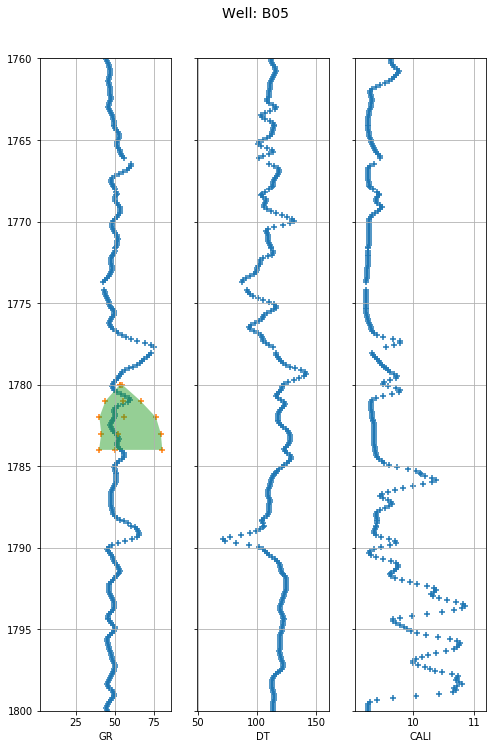

updated


In [10]:
def plot_predictions(df_logs, df_pred, well_name, bit_depth):
    try:
        f, ax = plots.make_log_plot(df_logs, well_name)
        predictions = munging.get_log_predictions(df_pred, well_name, bit_depth)
        
        plots.add_predictions(ax[0], predictions)
        
        for axs in ax:
            axs.set_ylim(1800, 1760)
        plt.show()
        
        print('updated')
        
    except AssertionError:
        f, ax = plots.make_log_plot(df_logs, well_name)
        print('no predictions found at this depth in this well')


interact(plot_predictions, df_logs=fixed(df_logs), df_pred=fixed(df_pred),
         well_name=fixed(well_name), bit_depth=(1760, 1800, 1));

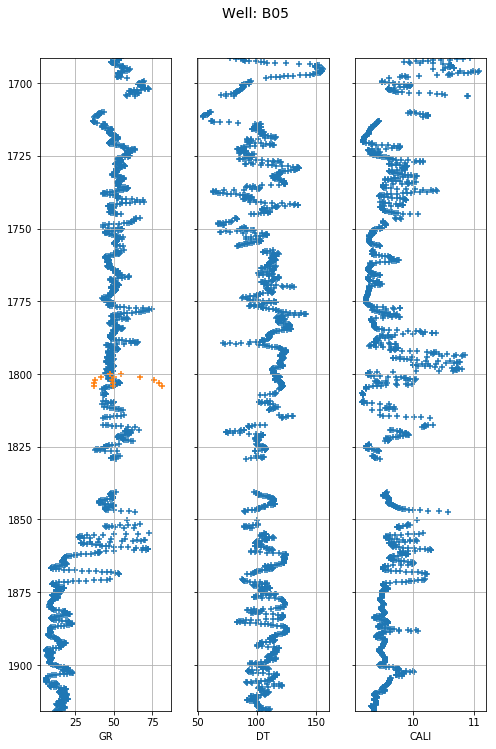

In [11]:
f, ax = plots.make_log_plot(df_logs, 'B05')
ax[0].scatter(predictions['value'], predictions['TVDSS'], marker='+')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import LeavePGroupsOut
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GridSearchCV

parameters = {'estimator__n_estimators':[5,20,100,500], 'estimator__learning_rate':[0.1,0.5,0.8,1],'estimator__max_depth': [3,10,15,50,100], 
             'estimator__max_features': [5,10,25,50], 'estimator__subsample': [0.5,0.7,0.8,0.9,1.0], 'estimator__min_samples_leaf': [1,2,10,50,100],
             'estimator__min_samples_split': [2,10,50,100]}
model = MultiOutputRegressor(GradientBoostingRegressor(loss='quantile', alpha=0.5))

X_train = df_ml_train[X_cols]
y_train = df_ml_train[y_cols]
grps_train = df_ml_train['HACKANAME']
print(model.get_params())

cv = LeaveOneGroupOut()
clf = GridSearchCV(model, parameters, cv=cv, scoring='neg_mean_squared_error',n_jobs=-1)
clf.fit(X_train, y_train, groups=grps_train)
results = pd.DataFrame(clf.cv_results_).sort_values('mean_train_score',ascending=False)
results.head()


{'estimator__alpha': 0.5, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'quantile', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__presort': 'auto', 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingRegressor(alpha=0.5, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators